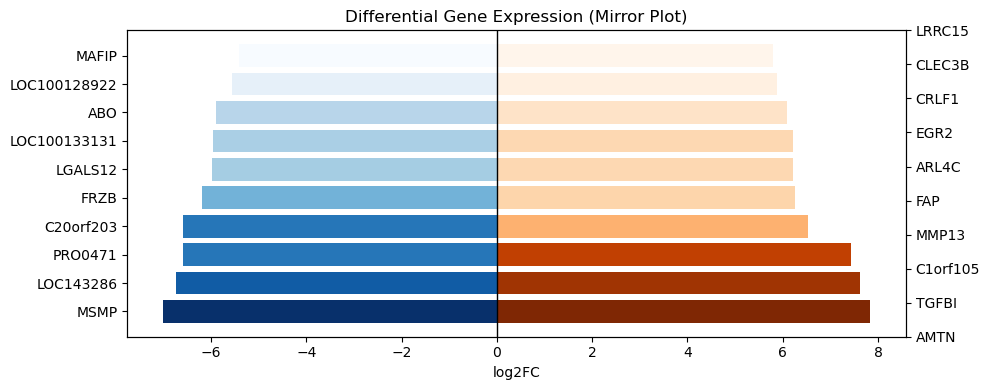

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize

# 示例数据（你可以换成自己的）
data = pd.DataFrame({
    'gene': ['AMTN', 'TGFBI', 'C1orf105', 'MMP13', 'FAP', 'EGR2', 'ARL4C', 'CRLF1', 'CLEC3B', 'LRRC15',
             'MAFIP', 'LOC100128922', 'ABO', 'LGALS12', 'FRZB', 'LOC100133131', 'C20orf203', 'LOC143286', 'PRO0471', 'MSMP'],
    'log2FC': [7.84, 7.62, 7.44, 6.54, 6.25, 6.21, 6.21, 6.08, 5.88, 5.79, 
               -5.42, -5.56, -5.89, -5.98, -6.19, -5.96, -6.58, -6.74, -6.58, -7.01],
    '-log10_pval': [7.84, 7.62, 7.44, 6.54, 6.25, 6.21, 6.21, 6.08, 5.88, 5.79, 
                    5.42, 5.56, 5.89, 5.98, 6.19, 5.96, 6.58, 6.74, 6.58, 7.01]
})

# 添加分组
data['group'] = data['log2FC'].apply(lambda x: 'Up' if x > 0 else 'Down')

# 分别提取 Up 和 Down 并排序（为了上下对齐）
up_genes = data[data['group'] == 'Up'].sort_values('log2FC', ascending=True)
down_genes = data[data['group'] == 'Down'].sort_values('log2FC', ascending=False)

# 保证上下基因数量一致时行数对齐（如果不一致，可能要填充）
max_len = max(len(up_genes), len(down_genes))
up_genes = up_genes.reset_index(drop=True)
down_genes = down_genes.reset_index(drop=True)

# 设置图像
fig, ax = plt.subplots(figsize=(10, max_len * 0.4))

# 创建颜色映射
norm_up = Normalize(vmin=up_genes['-log10_pval'].min(), vmax=up_genes['-log10_pval'].max())
norm_down = Normalize(vmin=down_genes['-log10_pval'].min(), vmax=down_genes['-log10_pval'].max())
colors_up = [cm.Oranges(norm_up(p)) for p in up_genes['-log10_pval']]
colors_down = [cm.Blues(norm_down(p)) for p in down_genes['-log10_pval']]

# 设置 y 轴
y_pos = range(max_len)

# 绘制右侧（Up）
ax.barh(y_pos[:len(up_genes)], up_genes['log2FC'], color=colors_up, label='Up-regulated')

# 绘制左侧（Down），注意要取负值
ax.barh(y_pos[:len(down_genes)], down_genes['log2FC'], color=colors_down, label='Down-regulated')

# 设置 y 轴标签（左右拼接）
gene_labels = [f"{g}" for g in down_genes['gene']]  # 左侧基因名
ax.set_yticks(y_pos)
ax.set_yticklabels(gene_labels)
ax.invert_yaxis()  # 上面是高表达

# 添加右侧基因名（Up）作为镜像轴
ax2 = ax.twinx()
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f"{g}" for g in up_genes['gene']])
ax2.invert_yaxis()

# 标签与标题
ax.set_xlabel('log2FC')
ax.set_title('Differential Gene Expression (Mirror Plot)')
ax.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()
